In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/demand.csv')
df

ID  Store ID  Total Price  Base Price  Units Sold
0            1      8091      99.0375    111.8625          20
1            2      8091      99.0375     99.0375          28
2            3      8091     133.9500    133.9500          19
3            4      8091     133.9500    133.9500          44
4            5      8091     141.0750    141.0750          52
...        ...       ...          ...         ...         ...
150145  212638      9984     235.8375    235.8375          38
150146  212639      9984     235.8375    235.8375          30
150147  212642      9984     357.6750    483.7875          31
150148  212643      9984     141.7875    191.6625          12
150149  212644      9984     234.4125    234.4125          15

[150150 rows x 5 columns]

In [2]:
df.shape

(150150, 5)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ID           150150 non-null  int64  
 1   Store ID     150150 non-null  int64  
 2   Total Price  150149 non-null  float64
 3   Base Price   150150 non-null  float64
 4   Units Sold   150150 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 5.7 MB


In [4]:
df = df.drop(['ID'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Store ID     150150 non-null  int64  
 1   Total Price  150149 non-null  float64
 2   Base Price   150150 non-null  float64
 3   Units Sold   150150 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 4.6 MB


In [5]:
df.head()

Store ID  Total Price  Base Price  Units Sold
0      8091      99.0375    111.8625          20
1      8091      99.0375     99.0375          28
2      8091     133.9500    133.9500          19
3      8091     133.9500    133.9500          44
4      8091     141.0750    141.0750          52

In [6]:
df.isnull().sum()

Store ID       0
Total Price    1
Base Price     0
Units Sold     0
dtype: int64

In [7]:
df = df.dropna()

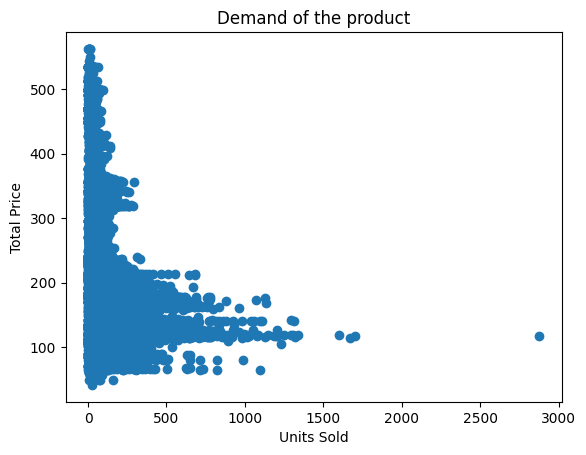

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(df['Units Sold'],df['Total Price'])
plt.title("Demand of the product")
plt.xlabel("Units Sold")
plt.ylabel("Total Price")
plt.show()

In [9]:
df.corr()

Store ID  Total Price  Base Price  Units Sold
Store ID     1.000000    -0.038315   -0.038855   -0.004369
Total Price -0.038315     1.000000    0.958885   -0.235625
Base Price  -0.038855     0.958885    1.000000   -0.140022
Units Sold  -0.004369    -0.235625   -0.140022    1.000000

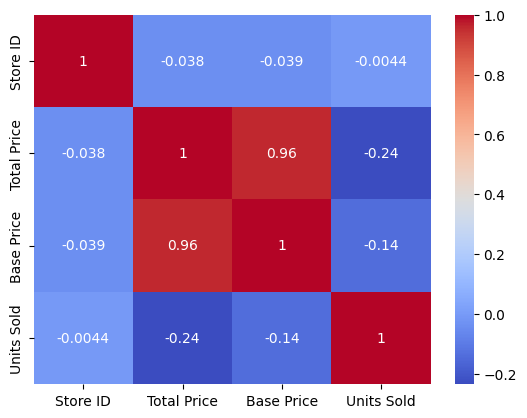

In [10]:
corr = df.corr(method = 'pearson')
sns.heatmap(corr,cmap="coolwarm",annot=True)
plt.show()

In [30]:
x = df[["Total Price", "Base Price"]]
y = df["Units Sold"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state =42)

In [12]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [13]:
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
y_pred = model.predict(x_test)
y_pred

array([ 36.71321408,  26.76732852, 199.17021277, ...,  13.82509938,
        13.82509938,  11.6       ])

In [32]:
y_test

144782     41
117        13
77408     339
62193      14
143901      4
         ... 
74053      37
39108      39
32510      18
108809      4
31396      21
Name: Units Sold, Length: 37538, dtype: int64

In [ ]:
from sklearn import metrics as ms
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)*100

In [25]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y,
                                                test_size=0.2,
                                                random_state=42)
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)

DecisionTreeRegressor()

In [26]:
y_pred = model.predict(x_test)
y_pred

array([22.99047619, 29.83076923, 43.51535088, ..., 28.11363636,
       22.19261822, 32.49269311])

In [27]:
y_test

53092      9
61733     11
147444    19
64835     58
149843    38
          ..
42243     11
31137     20
1295      20
57574      4
15002     21
Name: Units Sold, Length: 37538, dtype: int64

In [28]:
feat = np.array([[141,152]])
model.predict(feat)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([41.])

In [29]:
a = np.array([[160.00,180.00]])
model.predict(a)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([258.5])